In [ ]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os
import random
import zipfile

In [ ]:
!pip install -U git+https://github.com/faustomorales/keras-ocr.git#egg=keras-ocr
!pip install -U opencv-python 

  Cloning https://github.com/faustomorales/keras-ocr.git to /tmp/pip-install-6zoh1g9s/keras-ocr_c90acfcedede4b00b86abbc2ef260a96
  Running command git clone --filter=blob:none --quiet https://github.com/faustomorales/keras-ocr.git /tmp/pip-install-6zoh1g9s/keras-ocr_c90acfcedede4b00b86abbc2ef260a96
  Resolved https://github.com/faustomorales/keras-ocr.git to commit e8d34a46f07d50158e1d86d6c617e99bfe99e2f8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
try:
  from google.colab import drive
  import os
  drive.mount('/content/drive')
  data_dir = 'drive/My Drive/colab/keras-ocr'
  os.makedirs(data_dir, exist_ok=True)
except ImportError:
  data_dir = '.'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import datetime
import string
import glob
import math
import os
import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.model_selection
import traceback
import keras_ocr
import kagglehub

import random
import string
import numpy as np
import cv2
import PIL
import random
import pickle
from PIL import Image,ImageOps,Image, ImageDraw, ImageFont
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img


In [ ]:
backgrounds = keras_ocr.data_generation.get_backgrounds(cache_dir=data_dir)

Looking for drive/My Drive/colab/keras-ocr/backgrounds.zip


In [ ]:
def listar_archivos_desde_ruta(ruta,extension):
  files = []

  for dirpath, _, filenames in os.walk(ruta):
    for filename in filenames:
        if filename.lower().endswith(extension):
            files.append(os.path.join(dirpath, filename))
  print(f"\nArchivos de extension {extension} encontrados:{len(files)}\n" )
  return files

In [ ]:
root_dir_fonts = '/content/drive/MyDrive/colab/keras-ocr/fonts/'
ttf_files=listar_archivos_desde_ruta(root_dir_fonts,'.ttf')


Archivos de extension .ttf encontrados:2746



In [ ]:
root_dir_backgrounds = '/content/drive/MyDrive/colab/keras-ocr/backgrounds'
jpg_files=listar_archivos_desde_ruta(root_dir_backgrounds,'.jpg')


Archivos de extension .jpg encontrados:1034



In [ ]:
def generate_character_image(character, font_path, background_path, image_size=(244, 244), font_size=100):
    # Cargar y redimensionar el fondo
    background = Image.open(background_path).convert('RGB')
    background = background.resize(image_size)

    # Crear un contexto de dibujo
    draw = ImageDraw.Draw(background)

    # Cargar la fuente
    font = ImageFont.truetype(font_path, font_size)

    # Calcular el tamaño del texto utilizando font.getsize()
    text_width=50
    text_height=100

    # Centrar el texto
    position = ((image_size[0] - text_width) / 2, (image_size[1] - text_height) / 2)

    # Dibujar el texto sobre el fondo
    draw.text(position, character, font=font, fill=(0, 0, 0))

    # Calcular el bounding box del texto utilizando draw.textbbox()
    bbox = draw.textbbox(position, character, font=font)
    x1, y1, x2, y2 = bbox
    coordinates = np.array([x1, y1, x2, y1, x2, y2, x1, y2], dtype=np.float32)

    return background, character, coordinates


In [ ]:
def generate_dataset(characters, fonts, backgrounds, samples_per_class=10, image_size=(244, 244), font_size=100):
    images = []
    labels = []  # Cada etiqueta será una tupla (carácter, coordenadas)

    for char in characters:
        print(f"Generando imágenes para el carácter: {char}")
        for _ in range(samples_per_class):
            try:
                font_path = random.choice(fonts)
                background_path = random.choice(backgrounds)

                image, character, coordinates = generate_character_image(
                    character=char,
                    font_path=font_path,
                    background_path=background_path,
                    image_size=image_size,
                    font_size=font_size
                )

                images.append(image)
                labels.append((character, coordinates))

                print(f"Imagen generada para el carácter: {char}")
            except Exception as e:
                print(f"Error al generar la imagen para el carácter {char}: {e}")
                continue
    return images, labels


In [ ]:
characters = list('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789')


In [ ]:
# Preparar la lista de fuentes
fonts = []
for font_dir in ttf_files:
    if isinstance(font_dir, str):
        if os.path.isdir(font_dir):
            fonts_in_dir = glob.glob(os.path.join(font_dir, '*.ttf')) + glob.glob(os.path.join(font_dir, '*.otf'))
            fonts.extend(fonts_in_dir)
        else:
            print(f"El directorio de fuentes '{font_dir}' no existe.")
    else:
        print(f"El elemento '{font_dir}' en ttf_files no es una cadena de texto.")

# Preparar la lista de fondos
backgrounds = []
for img_dir in jpg_files:
    if isinstance(img_dir, str):
        if os.path.isdir(img_dir):
            backgrounds_in_dir = glob.glob(os.path.join(img_dir, '*.jpg')) + glob.glob(os.path.join(img_dir, '*.png'))
            backgrounds.extend(backgrounds_in_dir)
        else:
            print(f"El directorio de fondos '{img_dir}' no existe.")
    else:
        print(f"El elemento '{img_dir}' en jpg_files no es una cadena de texto.")


In [ ]:
samples_per_class = 500  # Puedes ajustar este valor
images, labels = generate_dataset(
    characters=characters,
    fonts=ttf_files,
    backgrounds=jpg_files,
    samples_per_class=samples_per_class,
    image_size=(244, 244),
    font_size=100
)


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter: 0
Imagen generada para el carácter:

In [ ]:
def save_dataset(images, labels, dataset_name):
    import os
    import pickle
    from PIL import Image

    if not os.path.exists(dataset_name):
        os.makedirs(dataset_name)

    image_folder = os.path.join(dataset_name, 'images')
    if not os.path.exists(image_folder):
        os.makedirs(image_folder)

    for idx, image in enumerate(images):
        image_path = os.path.join(image_folder, f'image_{idx}.png')
        image.save(image_path)

    labels_path = os.path.join(dataset_name, 'labels.pkl')
    with open(labels_path, 'wb') as f:
        pickle.dump(labels, f)

    print(f"Dataset '{dataset_name}' guardado correctamente.")


In [ ]:
save_dataset(images, labels, 'dataset_abc')

Dataset 'dataset_abc' guardado correctamente.


In [ ]:
def zip_file(zip_name,directory):
  with zipfile.ZipFile(zip_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
      for root, dirs, files in os.walk(directory):
          for file in files:
              file_path = os.path.join(root, file)
              zipf.write(file_path, os.path.relpath(file_path, directory))

In [ ]:
!zip -r archivo.zip "/content/dataset_abc"

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  adding: content/dataset_abc/images/image_28285.png (deflated 0%)
  adding: content/dataset_abc/images/image_26683.png (deflated 0%)
  adding: content/dataset_abc/images/image_22331.png (deflated 0%)
  adding: content/dataset_abc/images/image_1181.png (deflated 0%)
  adding: content/dataset_abc/images/image_12402.png (deflated 0%)
  adding: content/dataset_abc/images/image_26488.png (deflated 0%)
  adding: content/dataset_abc/images/image_12046.png (deflated 0%)
  adding: content/dataset_abc/images/image_25000.png (deflated 1%)
  adding: content/dataset_abc/images/image_5475.png (deflated 0%)
  adding: content/dataset_abc/images/image_9474.png (deflated 0%)
  adding: content/dataset_abc/images/image_19660.png (deflated 1%)
  adding: content/dataset_abc/images/image_20506.png (deflated 0%)
  adding: content/dataset_abc/images/image_30127.png (deflated 1%)
  adding: content/dataset_abc/images/image_30062.png (deflated 0%

# Verifico la correcta creación del dataset

In [ ]:
directory_data_abc = "/content/dataset_abc"
name = "directory_data_abc.zip"
zip_file(name,directory_data_train)

[ 98. 152. 152.  98.] [ 93.  93. 165. 165.]


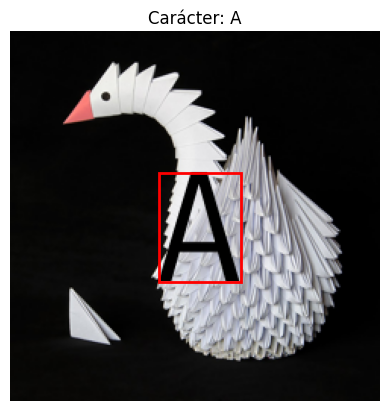

In [ ]:
test_image, test_char, test_coords = generate_character_image(
    character='A',
    font_path=ttf_files[21],
    background_path=jpg_files[26],
    image_size=(244, 244),
    font_size=100
)

# Mostrar la imagen y el bounding box
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1)
ax.imshow(test_image)
x_coords = test_coords[::2]
y_coords = test_coords[1::2]
bbox_points = list(zip(x_coords, y_coords))
polygon = patches.Polygon(bbox_points, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(polygon)
plt.axis('off')
plt.title(f'Carácter: {test_char}')
print(x_coords,y_coords)
plt.show()

In [ ]:
print(x_coords,y_coords)
type(x_coords)

[ 98. 152. 152.  98.] [ 93.  93. 165. 165.]


numpy.ndarray